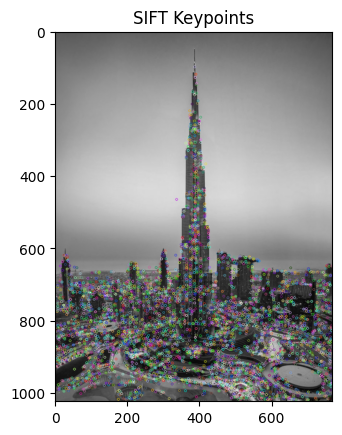

In [4]:
import cv2
import matplotlib.pyplot as plt

img = cv2.imread('/content/bui.jpg', cv2.IMREAD_GRAYSCALE)
sift = cv2.SIFT_create()
keypoints, descriptors = sift.detectAndCompute(img, None)
img_sift = cv2.drawKeypoints(img, keypoints, None)

plt.imshow(img_sift)
plt.title("SIFT Keypoints")
plt.show()


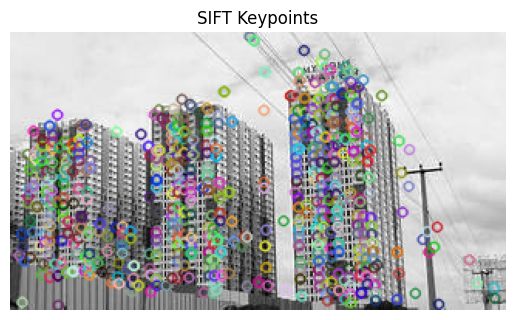

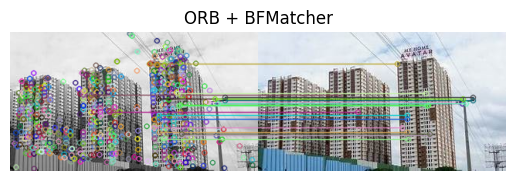

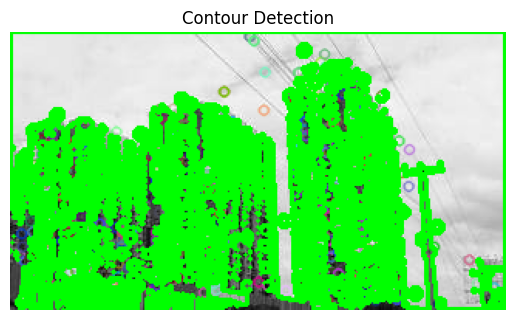

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the uploaded images
img1 = cv2.imread('/content/avat.jpg')  # Replace with your actual image name
img2 = cv2.imread('/content/avat.jpg')  # Replace with your actual image name

# Convert to grayscale
gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

# === SIFT ===
sift = cv2.SIFT_create()
kp1, des1 = sift.detectAndCompute(gray1, None)
kp2, des2 = sift.detectAndCompute(gray2, None)

img_sift = cv2.drawKeypoints(gray1, kp1, img1)
plt.imshow(cv2.cvtColor(img_sift, cv2.COLOR_BGR2RGB))
plt.title("SIFT Keypoints")
plt.axis('off')
plt.show()

# === ORB + BFMatcher ===
orb = cv2.ORB_create()
kp3, des3 = orb.detectAndCompute(gray1, None)
kp4, des4 = orb.detectAndCompute(gray2, None)

bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
matches = bf.match(des3, des4)
matches = sorted(matches, key=lambda x: x.distance)

img_matches = cv2.drawMatches(img1, kp3, img2, kp4, matches[:20], None, flags=2)
plt.imshow(cv2.cvtColor(img_matches, cv2.COLOR_BGR2RGB))
plt.title("ORB + BFMatcher")
plt.axis('off')
plt.show()

# === Contour Detection ===
gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

img_contours = img1.copy()
cv2.drawContours(img_contours, contours, -1, (0,255,0), 2)

plt.imshow(cv2.cvtColor(img_contours, cv2.COLOR_BGR2RGB))
plt.title("Contour Detection")
plt.axis('off')
plt.show()


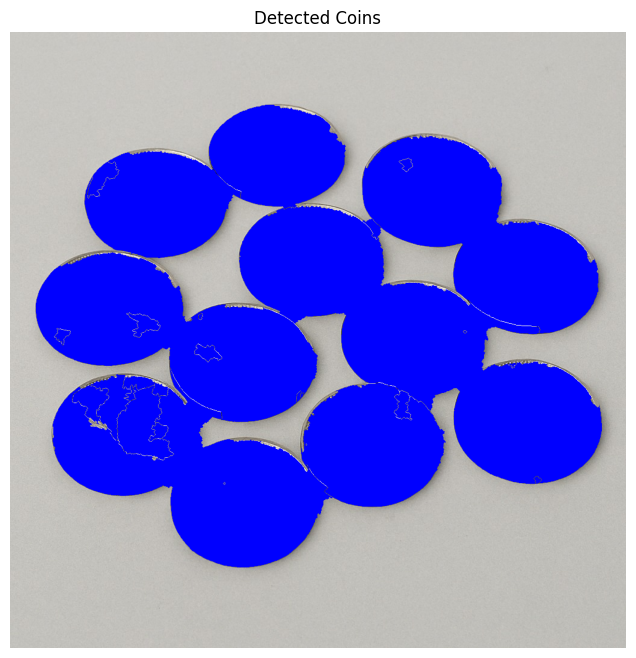

Number of coins detected: 29


In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load and preprocess image
img = cv2.imread('/content/coin.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
blur = cv2.GaussianBlur(gray, (5, 5), 0)

# Threshold (binary inverse + Otsu)
ret, thresh = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

# Noise removal with morphological opening
kernel = np.ones((3, 3), np.uint8)
opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=2)

# Sure background area via dilation
sure_bg = cv2.dilate(opening, kernel, iterations=3)

# Sure foreground area using distance transform
dist_transform = cv2.distanceTransform(opening, cv2.DIST_L2, 5)
ret, sure_fg = cv2.threshold(dist_transform, 0.2 * dist_transform.max(), 255, 0)
sure_fg = np.uint8(sure_fg)

# Unknown region = background - foreground
unknown = cv2.subtract(sure_bg, sure_fg)

# Marker labeling
ret, markers = cv2.connectedComponents(sure_fg)
markers = markers + 1  # Make sure background is not 0
markers[unknown == 255] = 0

# Apply Watershed
markers = cv2.watershed(img, markers)

# Create a copy of the original image
result = img.copy()

# Fill ONLY the detected regions (coins) with solid red
result[markers > 1] = [255, 0, 0]  # BGR format (red)



# Display the result
plt.figure(figsize=(10, 8))
plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
plt.title("Detected Coins")
plt.axis('off')
plt.show()

# Count the number of coins (subtract 1 for background)
num_coins = markers.max() - 1
print(f"Number of coins detected: {num_coins}")

In [7]:
import torchvision.models as models
import torchvision.transforms as transforms
from torchvision.datasets import CIFAR100
from torch.utils.data import DataLoader

# Load dataset
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
train_data = CIFAR100(root='./data', train=True, download=True, transform=transform)
test_data = CIFAR100(root='./data', train=False, download=True, transform=transform)

train_loader = DataLoader(train_data, batch_size=64, shuffle=True)
test_loader = DataLoader(test_data, batch_size=64, shuffle=False)

# Load models
resnet18 = models.resnet18(pretrained=True)
resnet34 = models.resnet34(pretrained=True)

# Modify final layer for 100 classes
resnet18.fc = torch.nn.Linear(resnet18.fc.in_features, 100)
resnet34.fc = torch.nn.Linear(resnet34.fc.in_features, 100)


100%|██████████| 169M/169M [00:02<00:00, 74.0MB/s]
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 161MB/s]
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weig

NameError: name 'torch' is not defined